#**Installing Dependencies for package**

In [3]:
pip install pandas numpy matplotlib seaborn nltk googletrans langdetect pycountry imbalanced-learn scikit-learn


####**Importing Necessary Packages**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(18,8)},style='darkgrid')
from time import time
import re
import string
import nltk
from googletrans import Translator
from langdetect import detect
import pycountry
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')

#**Uploading Train And Test Data to the Google Colab**

In [5]:
from google.colab import files

uploaded = files.upload()

Saving test_data.txt to test_data.txt
Saving train_data.txt to train_data.txt


####**Import Data of Train and Test**

In [7]:
traind = pd.read_csv(r"train_data.txt",
                    sep=':::',names=['Title', 'Genre', 'Description']).reset_index(drop=True)
traind.head()


,Title,Genre,Description
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [8]:
#Test Data
testd = pd.read_csv(r"test_data.txt",
                  sep=':::',names=['Title', 'Description']).reset_index(drop=True)
testd.head()


,Title,Description
0,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,Er nu zhai (1955),Before he was known internationally as a mart...


#**Analysing DataSet**

In [9]:
traind

,Title,Genre,Description
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54209,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [10]:
testd

,Title,Description
0,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...
54195,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [11]:
traind.shape

(54214, 3)

In [13]:
testd.shape

(54200, 2)

In [12]:
traind.describe

<bound method NDFrame.describe of                                               Title          Genre  \
0                     Oscar et la dame rose (2009)          drama    
1                                     Cupid (1997)       thriller    
2                 Young, Wild and Wonderful (1980)          adult    
3                            The Secret Sin (1915)          drama    
4                           The Unrecovered (2007)          drama    
...                                             ...            ...   
54209                              "Bonino" (1953)         comedy    
54210                  Dead Girls Don't Cry (????)         horror    
54211    Ronald Goedemondt: Ze bestaan echt (2008)    documentary    
54212                     Make Your Own Bed (1944)         comedy    
54213   Nature's Fury: Storm of the Century (2006)        history    

                                             Description  
0       Listening in to a conversation between his do...  
1      

In [14]:
testd.describe

<bound method NDFrame.describe of                                   Title  \
0                 Edgar's Lunch (1998)    
1             La guerra de papá (1977)    
2          Off the Beaten Track (2010)    
3               Meu Amigo Hindu (2015)    
4                    Er nu zhai (1955)    
...                                 ...   
54195   "Tales of Light & Dark" (2013)    
54196      Der letzte Mohikaner (1965)    
54197              Oliver Twink (2007)    
54198                Slipstream (1973)    
54199        Curitiba Zero Grau (2010)    

                                             Description  
0       L.R. Brane loves his life - his car, his apar...  
1       Spain, March 1964: Quico is a very naughty ch...  
2       One year in the life of Albin and his family ...  
3       His father has died, he hasn't spoken with hi...  
4       Before he was known internationally as a mart...  
...                                                  ...  
54195   Covering multiple genres, Ta

In [15]:
traind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [16]:
testd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54200 non-null  object
 1   Description  54200 non-null  object
dtypes: object(2)
memory usage: 847.0+ KB


#**Data Cleaning**

####For Train Data

In [17]:
traind.describe(include='object').T

,count,unique,top,freq
Title,54214,54214,Oscar et la dame rose (2009),1
Genre,54214,27,drama,13613
Description,54214,54086,Grammy - music award of the American academy ...,12


In [18]:
traind.info() #No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [19]:
traind.duplicated().sum() #No duplicates

0

In [20]:
traind.Genre.unique() #No anomalies values

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

####For Test Data

In [21]:
testd.describe(include='object').T

,count,unique,top,freq
Title,54200,54200,Edgar's Lunch (1998),1
Description,54200,54072,Grammy - music award of the American academy ...,10


In [22]:
testd.info() #No Null Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54200 non-null  object
 1   Description  54200 non-null  object
dtypes: object(2)
memory usage: 847.0+ KB


In [23]:
testd.duplicated().sum() #No duplicates

0

#**Data Exploratory**

Text Cleaning

**Searching for anomalies in description:**

*   Punctuations
*   Numbers
*   HTTP





In [24]:
traind.loc[traind['Description'].str.contains(r'@\S+')].head()


,Title,Genre,Description
242,Túlvilági beszélö (1992),documentary,Mail <svaradi@sprynet.com> for translation. T...
1880,Rokonok (1954),drama,Mail <svaradi@sprynet.com> for translation. F...
1986,Lila akác (1934),comedy,Mail <svaradi@sprynet.com> for translation. S...
6579,A csúnya lány (1935),comedy,Mail <svaradi@sprynet.com> for translation. D...
8296,Füszer és csemege (1940),drama,Mail <svaradi@sprynet.com> for translation. 5...


In [25]:
#We discover that there is more than one language so we need to handle that
#First we need to discover different languages
def detect_language(text):
    try:
        #Returning the name 'English instide of en'
        return pycountry.languages.get(alpha_2=detect(text)).name.lower()
    except:
        return 'Unknown'
traind['Language'] = traind['Description'].apply(detect_language)
testd['Language'] = testd['Description'].apply(detect_language)
traind.head()

,Title,Genre,Description,Language
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,english
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,english
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,english
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,english
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,english


AttributeError: ignored

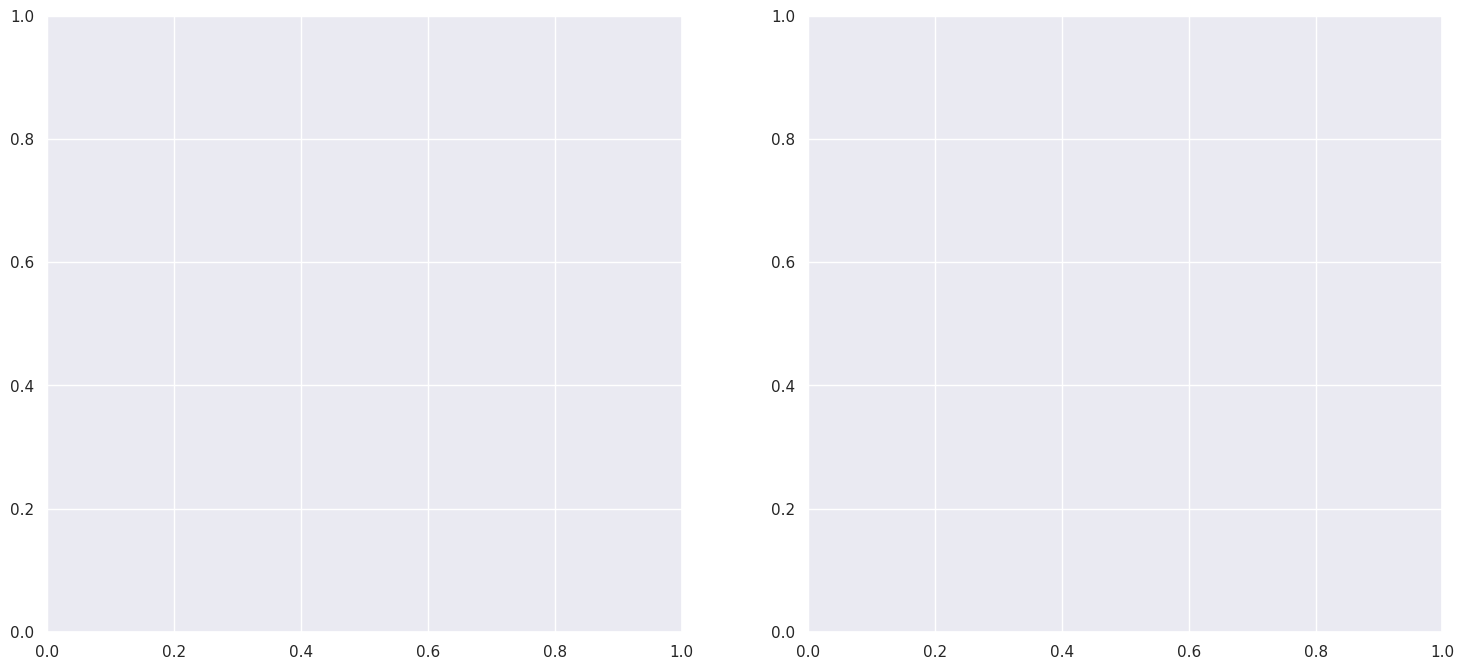

In [56]:
fig,axs = plt.subplots(1,2)
axs[0].pie(traind.Language.value_counts().values.tolist(),autopct='%.2f%%')
axs[0].legend(labels=traind.Language.value_counts().index.tolist(),loc='lower left')
sns.countplot(data=traind,y='Language',order=traind.Language.value_counts().index.tolist(),ax=axs[1],color='lightblue')
axs[1].bar_label(axs[1].containers[0])
fig.show()

#We have identified a subset of other languages in our data, and we plan to address them later by translating them into the standard language (English) in our cleaning function.

In [32]:
#Descriptions included HTTP links
traind.loc[traind['Description'].str.contains(r'http\S+')].shape[0]

9

In [35]:
#For example
traind.loc[traind['Description'].str.contains(r'http\S+')].head()['Description'].iloc[1]
#So we need to remove them from our text

" There's more to the story of the Clintons and 9/11. Over two nights -- September 10-11, 2006, just four months before Hillary announced the exploratory committee for her original presidential campaign, ABC aired The Path to 9/11, a riveting and factual docudrama. This acclaimed and balanced movie faulted two administrations -- Bill Clinton and George W. Bush. But fairness was not what Hillary wanted. Screenwriter Cyrus Nowrasteh told me he had expected the customary DVD distribution. But the Clintons, fearing the impact of DVD release during her campaign, successfully pressured Disney, which owns ABC, to bury the movie. This is a portion of a news article that originally appeared: http://www.frontpagemag.com/fpm/261541/hillarys-path-back-911-arnold-steinberg This article originally appeared in The Huffington Post http://www.huffingtonpost.com/arnold-steinberg/hillarys-path-back-to-911_b_9039658.html This article was written by Arnold Steinberg from Huffington Post and was legally lic

#**Cleaning Text Function**

In [36]:
def clean_text(text):
    # Remove strange pattern in different languages if exist
    text = re.sub('Mail <svaradi@sprynet.com> for translation. ','',text)
    # Remove twitter handles
    text = re.sub(r'@\S+', '', text)
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove punctuations
    text = re.sub(f'[{string.punctuation}]','',text)
    # Remove numbers
    text = re.sub(f'[{string.digits}]','',text)
    # Remove single charachters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    return text

In [38]:
#Clean Descriptions
traind['Description'] = traind['Description'].apply(clean_text)
testd['Description'] = testd['Description'].apply(clean_text)

In [39]:
traind[~traind.Language.isin(['english'])]

,Title,Genre,Description,Language
210,Divorzio alla siciliana (1963),comedy,Il barone Fifě ha bisogno di un erede per ave...,italian
242,Túlvilági beszélö (1992),documentary,Tollas Tibor az os fordulatot kovetoen katona...,hungarian
282,"""Boogie-woogie 47"" (1980)",drama,En plusieurs familles de Montréal passent lé...,french
806,Iszony (1965),drama,Mail to author for translation Karasz Nelli a...,hungarian
837,Entretien avec Anne Claire Poirier (2005),biography,Long métrage documentaire qui explore la carr...,french
...,...,...,...,...
53697,Fantasmi e ladri (1959),comedy,Annunziata ha letto diecimila gialli spopola ...,italian
53712,Due notti con Cleopatra (1954),comedy,Cleopatra č una donna bellissima ma ha un pic...,italian
53878,Gyilkos kedv (1997),drama,Kora delutan egy iskolabol hazatero kislany c...,hungarian
54165,Az áldozat (1994),documentary,Mail author for translation Az os forradalom ...,hungarian


In [42]:
#Translate other languages
def trans(text):
    try:
        return Translator().translate(text,dest='en').text
    except:
        return text
traind.loc[~traind['Language'].isin(['english']), 'Description']=traind.loc[~traind['Language'].isin(['english']),'Description'].apply(trans)
testd.loc[~testd['Language'].isin(['english']), 'Description']=testd.loc[~testd['Language'].isin(['english']),'Description'].apply(trans)

In [45]:
traind.drop(columns='Language',inplace=True)
testd.drop(columns='Language',inplace=True)

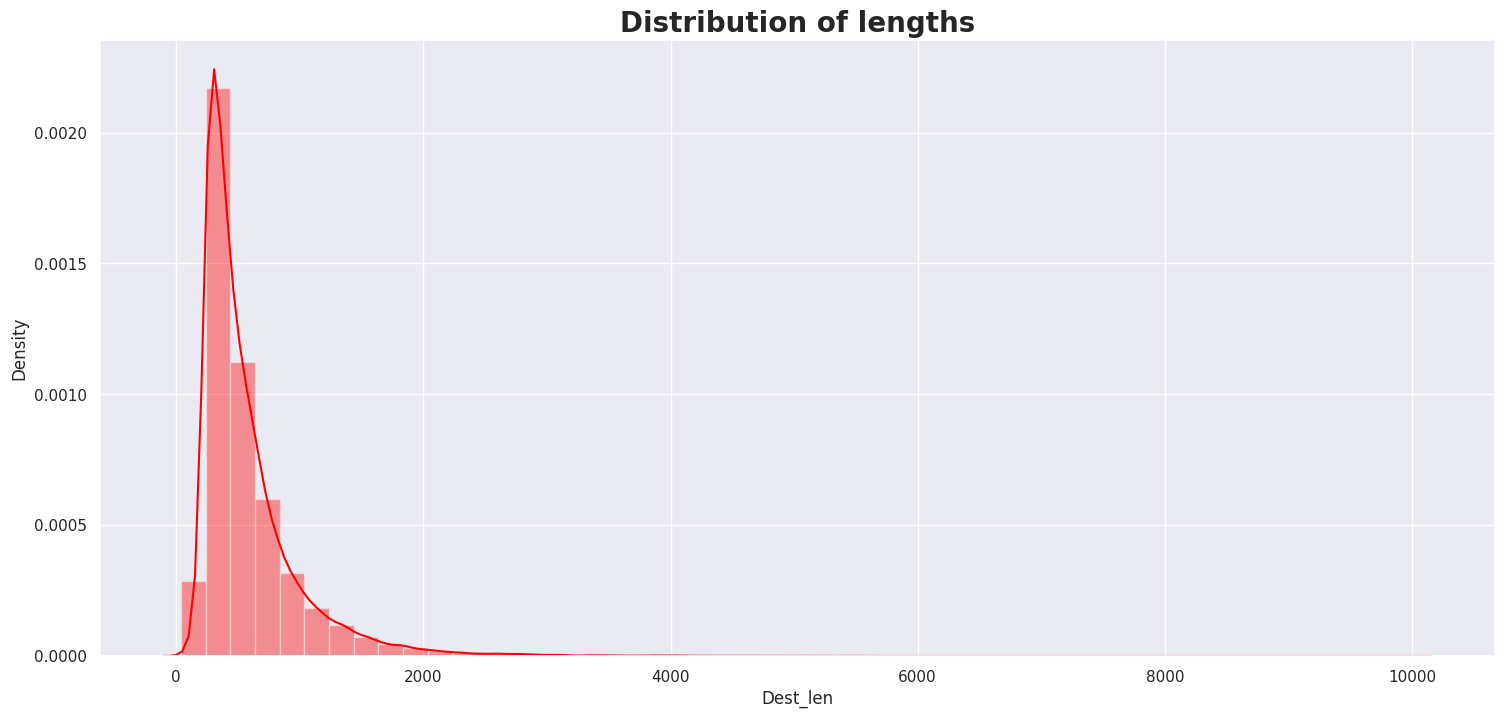

In [51]:
traind['Dest_len'] = traind['Description'].apply(len)
sns.distplot(traind['Dest_len'],color='red')
plt.title('Distribution of lengths',fontweight='bold',fontsize=20)
plt.show()

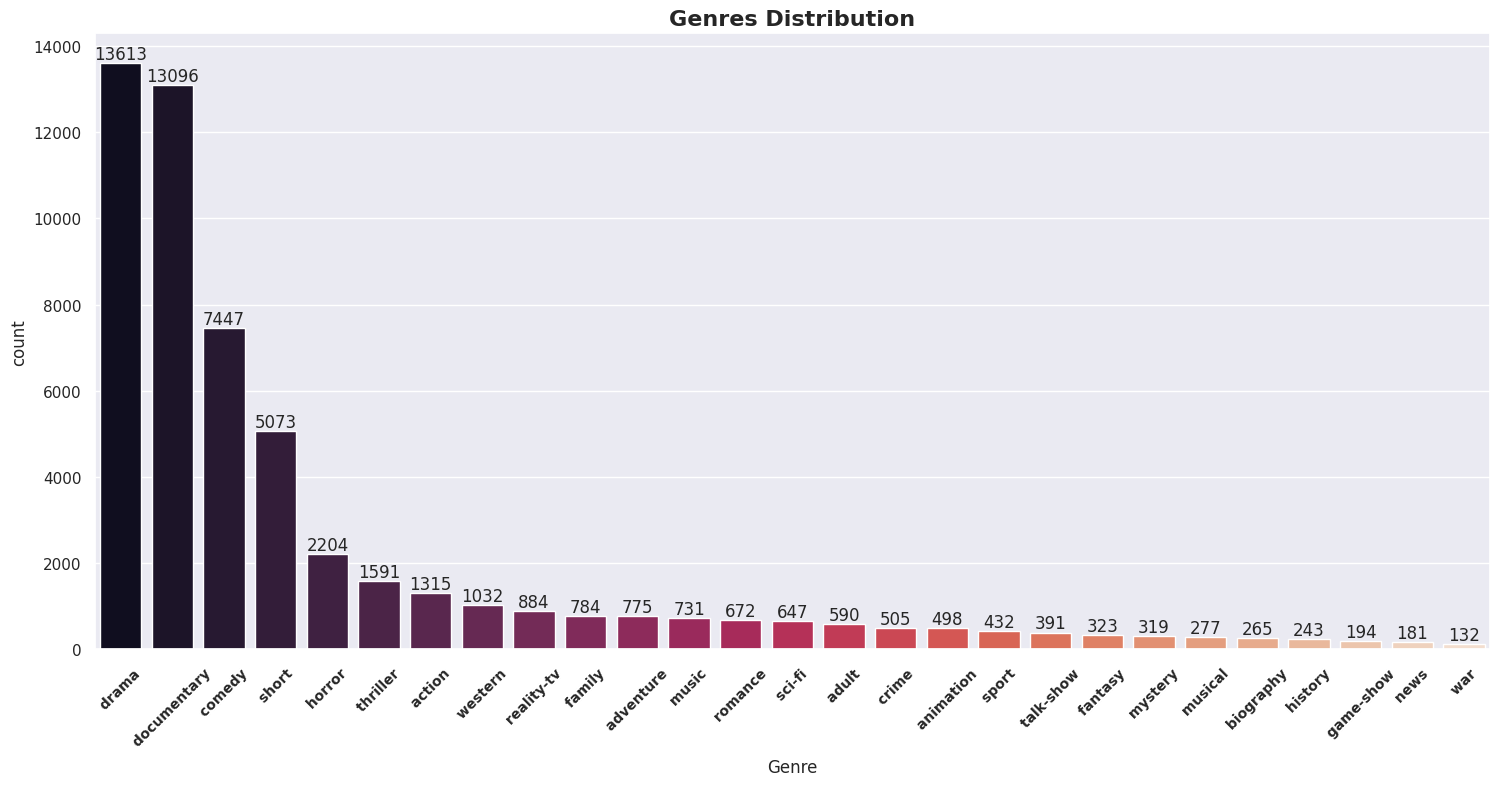

In [58]:
ax=sns.countplot(data=traind,x='Genre',order=traind.Genre.value_counts().index,palette='rocket')
ax.bar_label(ax.containers[0])
plt.title('Genres Distribution',fontweight='bold',fontsize=16)
plt.xticks(rotation=45,fontweight='bold',fontsize=10)
plt.show()

#***Model Selection And Predicting ***

In [60]:
# Using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(lowercase=True, #Lowercase chars
                                   ngram_range=(1,1), #Capture only single words in each text(unigrams)
                                   stop_words='english',#Remove stop_words
                                   min_df=2)#Ignore words that appears less than 2 times
x_train = tfidf_vectorizer.fit_transform(traind['Description'])
x_test = tfidf_vectorizer.transform(testd['Description'])

We previously observed that drama and documentary genres dominate the majority of our dataset. To address potential imbalances in our data for model training, we will perform random oversampling. It is important to note that the accuracy before sampling may be lower than the accuracy after oversampling. Below, we employ the RandomOverSampler to balance the distribution of genres in our training data. We pass the output of the TfidfVectorizer applied to the training data (x_train) and the corresponding genre labels (train['Genre']) to the oversampler:

In [62]:
sampler = RandomOverSampler()
#We will pass to it the output of TfidfVectorizer from train data
x_train_resampled , y_train_resampled = sampler.fit_resample(x_train,traind['Genre'])

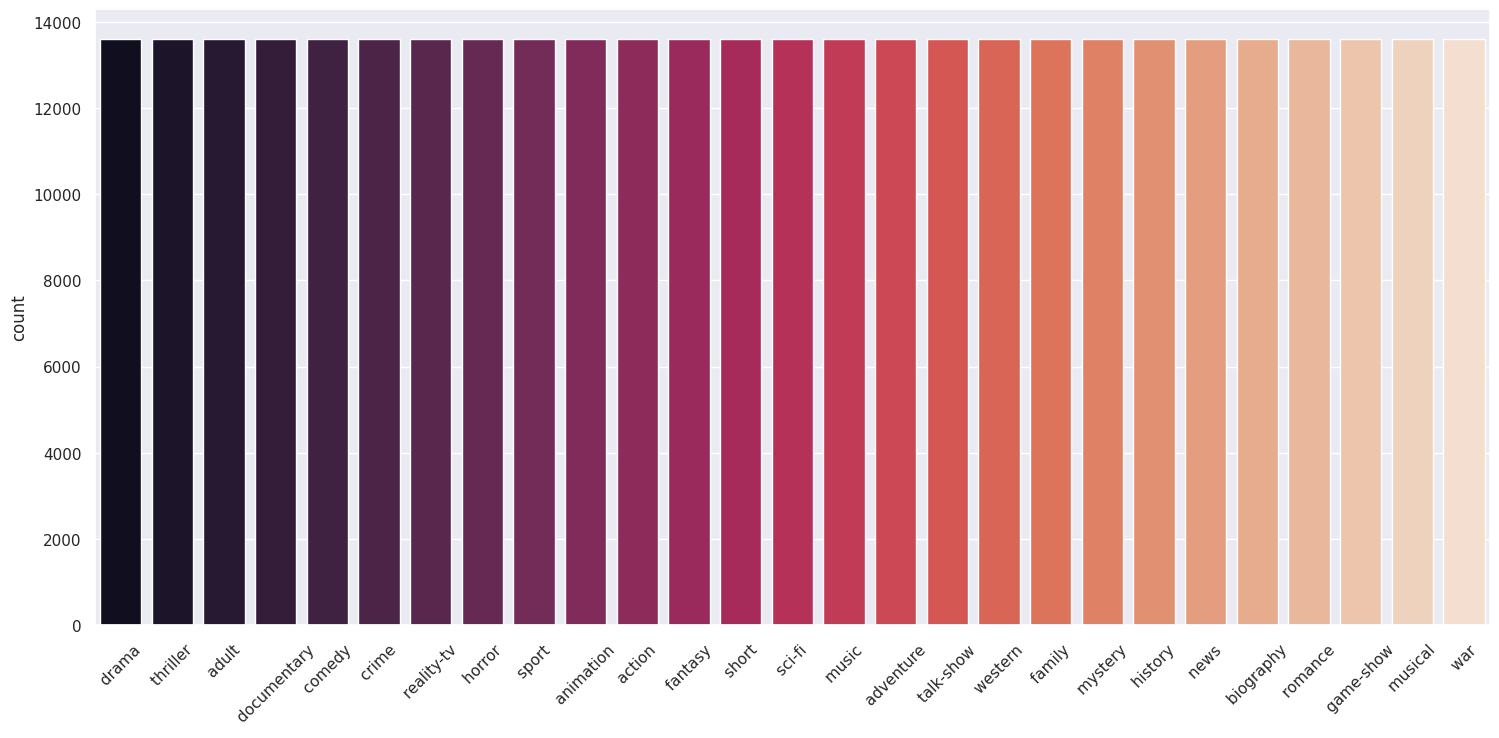

In [63]:
#Let's take a look on genre distribution
sns.countplot(data=y_train_resampled,x=y_train_resampled.values,palette='rocket')
plt.xticks(rotation=45)
plt.show()

In [64]:
#Double check for length of our data
print('Train :',x_train_resampled.shape[0])
print('Test :',y_train_resampled.shape[0])

Train : 367551
Test : 367551


In [67]:
from google.colab import files

uploaded = files.upload()

Saving test_data_solution.txt to test_data_solution.txt


In [68]:
#Get the actual solutions to compare it with our predictions
a= pd.read_csv(r"test_data_solution.txt",
                      sep=':::',usecols=[2],header=None).rename(columns={2:'Actual_Genre'})
a.head()

,Actual_Genre
0,thriller
1,comedy
2,documentary
3,drama
4,drama


In [73]:
#Naive Bayes Model
NB = MultinomialNB(alpha=0.3)
start_time = time()
NB.fit(x_train_resampled,y_train_resampled)
y_pred = NB.predict(x_test)
print('Accuracy :',accuracy_score(a,y_pred))
end_time = time()
print('Running Time : ',round(end_time - start_time,2),'Secounds')

Accuracy : 0.5455350553505535
Running Time :  2.3 Secounds


In [75]:
print(classification_report(a,y_pred))

               precision    recall  f1-score   support

      action        0.37      0.49      0.42      1314
       adult        0.51      0.53      0.52       590
   adventure        0.34      0.25      0.29       775
   animation        0.31      0.23      0.26       498
   biography        0.04      0.03      0.03       264
      comedy        0.58      0.54      0.56      7446
       crime        0.15      0.16      0.16       505
 documentary        0.72      0.72      0.72     13096
       drama        0.64      0.57      0.60     13612
      family        0.26      0.23      0.24       783
     fantasy        0.15      0.13      0.14       322
   game-show        0.77      0.68      0.72       193
     history        0.10      0.07      0.08       243
      horror        0.52      0.68      0.59      2204
       music        0.40      0.72      0.52       731
     musical        0.17      0.09      0.12       276
     mystery        0.17      0.09      0.12       318
        n

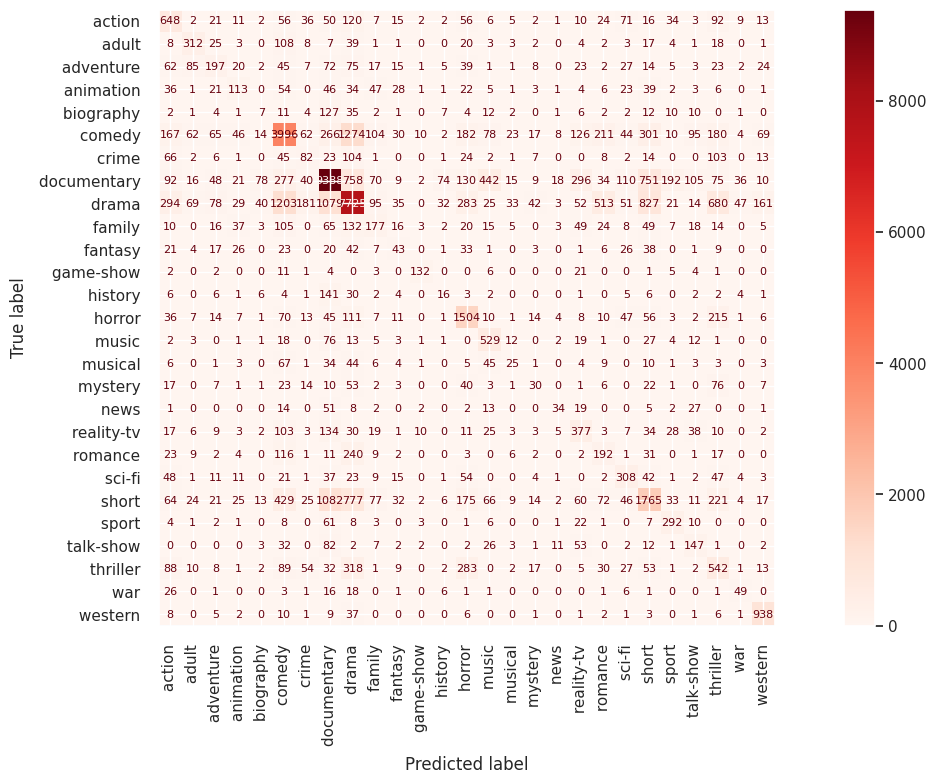

In [78]:
cm =confusion_matrix(a,y_pred,labels=NB.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=NB.classes_)
cmd.plot(cmap=plt.cm.Reds,xticks_rotation='vertical',text_kw={'size': 8})
plt.show()

In [80]:
pd.concat([pd.concat([testd,a],axis=1),pd.Series(y_pred)],axis=1).rename(columns={0:'Predicted_Genre'}).head(10)

,Title,Description,Actual_Genre,Predicted_Genre
0,Edgar's Lunch (1998),LR Brane loves his life his car his apartmen...,thriller,comedy
1,La guerra de papá (1977),Spain March Quico is very naughty child of t...,comedy,drama
2,Off the Beaten Track (2010),One year in the life of Albin and his family ...,documentary,documentary
3,Meu Amigo Hindu (2015),His father has died he hasnt spoken with his ...,drama,drama
4,Er nu zhai (1955),Before he was known internationally as martia...,drama,action
5,Riddle Room (2016),Emily Burns is being held captive in room wit...,horror,thriller
6,L'amica (1969),The beautiful but neglected wife of brilliant...,drama,drama
7,Ina Mina Dika (1989),Vasu Inamdar Ina suffers from disorder where ...,comedy,comedy
8,Equinox Special: Britain's Tornados (2005),An insight into the tornados that hit Kensal ...,documentary,documentary
9,Press (2011),Press is story of young people overwhelmed by...,drama,short


####**Lets Try Another approach to Increase Accuracy rate**

In [82]:
#We got low accuracy due to insufficient data for other categories
#So the model trained alot about drama and documentary movies so it's hard to discover the others
#Now let's try another approach and see the effect on data
y_train_modified = traind['Genre'].apply(lambda genre: genre if genre.strip() in ['drama','documentary'] else 'other')
y_actual_modified = a['Actual_Genre'].apply(lambda genre: genre if genre.strip() in ['drama','documentary'] else 'other')

In [88]:
NB = MultinomialNB(alpha=0.3)
start_time = time()
NB.fit(x_train,y_train_modified)
y_pred = NB.predict(x_test)
print('Accuracy :',accuracy_score(y_actual_modified,y_pred))
end_time = time()
print('Running Time : ',round(end_time - start_time,2),'Secounds')

Accuracy : 0.6947416974169742
Running Time :  0.26 Secounds
